<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Guided Problem Set 9: Bayesian and Frequentist Statistics</h1>


<a name='section_9_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P9.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_9_1">P9.1 Bayesian and Frequentist Statistics</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_9_1">P9.1 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_9_2">P9.2 A New Prior</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_9_2">P9.2 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_9_3">P9.3 Example Applying Bayes' Theorem</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_9_3">P9.3 Problems</a></td>
    </tr>
</table>

<h3>Learning Objectives</h3>

In this Pset we will explore the following objectives:

- Understand the basis for Bayes' theorem
- Discuss how it fits into more general Bayesian statistics and its difference from frequentists' perspective
- Look at examples of applying Bayes' theorem

In [1]:
#>>>RUN: P9.0-runcell01

!pip install lmfit
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.4 MB/s eta 0:00:00


<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.

In [2]:
#>>>RUN: P9.0-runcell02

import numpy as np               #https://numpy.org/doc/stable/
import matplotlib.pyplot as plt  #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import pandas as pd              #https://pandas.pydata.org/docs/user_guide/index.html
import lmfit
from scipy.special import comb
from scipy.signal import peak_widths

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [3]:
#>>>RUN: P9.0-runcell03

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_9_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P9.1 Bayesian and Frequentist Statistics</h2>   

| [Top](#section_9_0) | [Previous Section](#section_9_0) | [Problems](#problems_9_1) | [Next Section](#section_9_2) |


<h3>Bayes' Theorem</h3>

Bayes' Theorem is a fundamental concept in probability theory and statistics that allows us to update our beliefs or assess the probability of an event occurring based on new evidence or data. The theorem is expressed as follows:

$$
\begin{equation}
P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)}
\end{equation}
$$

In this equation, we have several components that play different roles:

- $P(A|B)$ represents the probability of event A occurring given that event B is true. It is referred to as the "posterior" probability, as it represents our updated belief about event A after considering the evidence from event B.

- $P(A)$ is the probability of event A happening before considering any new evidence, known as the "prior" probability of A. It represents our initial belief or knowledge about the likelihood of event A occurring.

- $P(B|A)$ represents the probability of event B occurring given that event A is true. This is often referred to as the "likelihood" and quantifies how well event A explains or predicts event B.

- $P(B)$ is the probability of event B occurring, regardless of whether event A is true or not. It serves as a normalizing factor in the equation, ensuring that the probabilities are properly scaled.

In practice, the denominator $P(B)$ is often treated as a normalizing constant. Since we usually need other hypotheses or events for comparison in order to determine $P(B)$, it is often omitted from the expression. As a result, we often work with the proportionality relation:

$$
\begin{equation*}
P(A|B) \propto P(A) \cdot P(B|A)
\end{equation*}
$$

This proportional relationship allows us to update our beliefs by multiplying the prior probability of event A by the likelihood of event B given event A. By doing so, we obtain the posterior probability of event A given the new evidence from event B.

In the context of this course, we commonly use the notation:

$$
\begin{equation*}
P(M|D) \propto P(M) \cdot P(D|M)
\end{equation*}
$$

Here, we consider event M as the model we are attempting to apply to the observed data D. We can update our belief about the model M by multiplying the prior probability of the model, $P(M)$, by the likelihood of obtaining the observed data given the model, $P(D|M)$. This proportional relationship allows us to assess the posterior probability of the model given the observed data.

Bayes' Theorem provides a powerful framework for reasoning under uncertainty and is widely used in various fields, including machine learning, statistics, and artificial intelligence. It enables us to incorporate new evidence or data into our decision-making process and revise our beliefs accordingly.

<h3>Frequentist vs. Bayesian Picture</h3>

In the context of statistical inference, the frequentist and Bayesian approaches represent two different perspectives on how to analyze and interpret data. Let's explore these approaches using the example of flipping a coin to understand the contrasting viewpoints.

Consider a scenario where we are uncertain about whether a coin is fair (with equal probability for heads and tails) or unfair (with unequal probabilities for heads and tails). We denote the probabilities of heads and tails as $P(H)$ and $P(T)$, respectively.

Now, suppose we flip the coin 20 times and obtain heads 15 times. What are the different perspectives on what has happened?

<h4>Frequentist Picture</h4>

From a frequentist perspective, the analysis focuses on the observed data. In this case, we observe that the proportion of heads in our sample is 15 out of 20 flips. Based on this information, the frequentist concludes that the estimated probability of heads is $15/20=0.75$. **Therefore, the frequentist would infer that the coin is unfair, favoring heads.**

<h4>Bayesian Picture</h4>

The Bayesian approach takes a different viewpoint, treating probabilities as random variables and incorporating prior beliefs into the analysis. In the Bayesian framework, the parameter of interest, in this case, the probability of heads $p=P(H)$, is treated as a random variable.

To proceed in the Bayesian picture, we need to assign a prior probability distribution to $p$. Let's assume a uniform prior, where all values of $p$ are equally likely, denoted as $P(M)$.

Using Bayes' equation, we can update our prior beliefs based on the observed data. The posterior probability distribution of $p$ given the data $D$ is proportional to the product of the prior distribution $P(M)$ and the likelihood of the data given $p$, denoted as $P(D|p)$. The likelihood follows a binomial distribution since it represents the probability of obtaining $m$ heads out of $N$ flips given the probability $p$.

The resulting expression for the posterior probability distribution $P(p|D)$ is:

$$
\begin{equation}
P(p|D)\propto P(p)\cdot P(D|p)= \frac{N!}{m!(N-m)!}(1-p)^{N-m} p^{m}
\end{equation}
$$

This posterior probability distribution provides a range of possible values for $p$ based on our prior beliefs and the observed data. By analyzing the distribution, we can obtain information about the uncertainty associated with the parameter estimate.

<h3>Define the posterior probability distribution</h3>

We can now define the probability distribution for $p$ for given values of $N$ and $m$ using python:

In [4]:
#>>>RUN: P9.1-runcell01

def with_uniform_prior(p,N,m):
    return comb(N,m)*np.power(p,m)*np.power(1-p,N-m)

<a name='problems_9_1'></a>     

| [Top](#section_9_0) | [Restart Section](#section_9_1) | [Next Section](#section_9_2) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 9.1.1</span>

Using the function above, plot out the probability distribution of $p$ for $N=20$ and $m=15$, in the range $p=[0,1]$. Use `np.argmax` to find the probability that maximizes the distribution, and report the result with precision 1e-2.

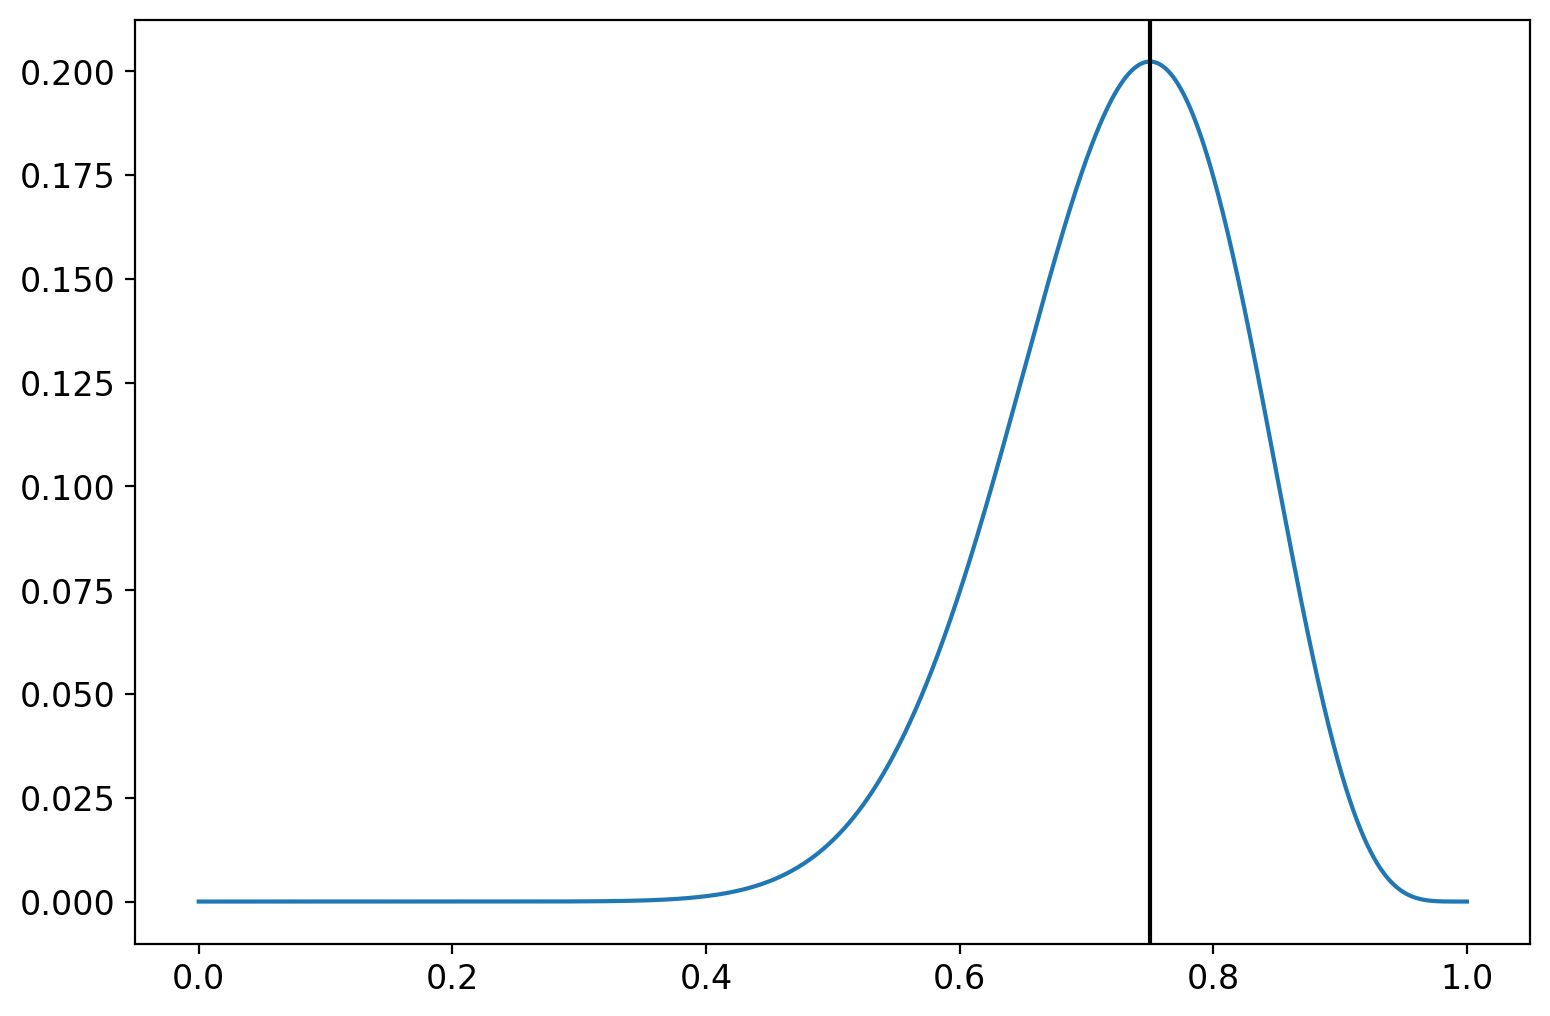

Best p:  0.75


In [5]:
#>>>PROBLEM: P9.1.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

N = 20
m = 15
p = np.arange(0,1,.0001)
posterior = with_uniform_prior(p,N,m)     # calculating P(p|D)
plt.plot(p,posterior)


best_p = p[np.argmax(posterior)]          # getting the value of p where P(p|D) is maximized
plt.axvline(best_p,c='k')            # plotting the line at p where P(p|D) is maximized
plt.show()
print('Best p: ', round(best_p,3))

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 9.1.2</span>

Plot the following probability distributions over the range $p=[0,1]$:

a) $N$=100, $m$=75\
b) $N$=4, $m$=3

How does distribution (a) compare to distribution (b)? Select the best answer choice from the option below:

A) Distribution (a) is maximized at a higher probability.\
B) Distribution (a) is more narrow and symmetric.\
C) The distribution shape does not depend on the number of iterations, $N$.

<a name='section_9_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P9.2 A New Prior</h2>    

| [Top](#section_9_0) | [Previous Section](#section_9_1) | [Problems](#problems_9_2) | [Next Section](#section_9_3) |

<h3>A New Prior</h3>

In this updated scenario, we are revisiting the coin flipping situation but adopting a different set of prior assumptions. Instead of assuming an equal chance for the coin to be fair or unfair, we now believe it is highly unlikely for a coin to be unfair. We are 99% confident that we are dealing with a normal coin, meaning a coin with equal probabilities for heads and tails. To represent this belief, we can model our prior assumption as a Gaussian distribution centered at $p=0.5$ with a standard deviation of $\sigma=0.01$.

To incorporate this new prior into our analysis, we modify the prior distribution as follows:

$$
\begin{gather*}
P(p)=0.99\cdot \frac{1}{\sqrt{2\pi}\cdot 0.01}\exp\left(-\frac{1}{2}\frac{(p-0.5)^2}{(0.01)^2}\right)+0.01
\end{gather*}
$$

This updated prior combines a normal distribution with a mean of 0.5 and a standard deviation of 0.01, weighted by a factor of 0.99, with a constant term of 0.01. The constant term accounts for the remaining 1% chance that the coin could still be unfair.

Similar to the previous case, we can visualize the effect of this new prior by plotting the probability distribution for P(H). The function `with_new_prior` takes into account the updated prior assumptions and helps us understand how the distribution for P(H) is affected. Let's try it out in the exercises below.

In [6]:
#>>>RUN: P9.2-runcell01

def with_new_prior(p,N,m):
    prior = 0.99 / (0.01 * np.sqrt(2*np.pi)) * np.exp(-(p-0.5)**2/(2*0.01**2))+0.01
    return prior*with_uniform_prior(p,N,m)

<a name='problems_9_2'></a>     

| [Top](#section_9_0) | [Restart Section](#section_9_2) | [Next Section](#section_9_3) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 9.2.1</span>

Using the new prior, again plot the distributions over the range for $p=[0,1]$ for the following values of $N$ and $m$:

a) $N=20$, $m=15$\
b) $N=4$, $m=3$\
c) $N=100$, $m=75$

For what probabilities are the three distributions with the new prior maximized now? Write your answer as a list of the values of maximum p, with a precision of 1e-3: `[(N=20, m=15), (N=4, m=3), (N=100, m=75)]`

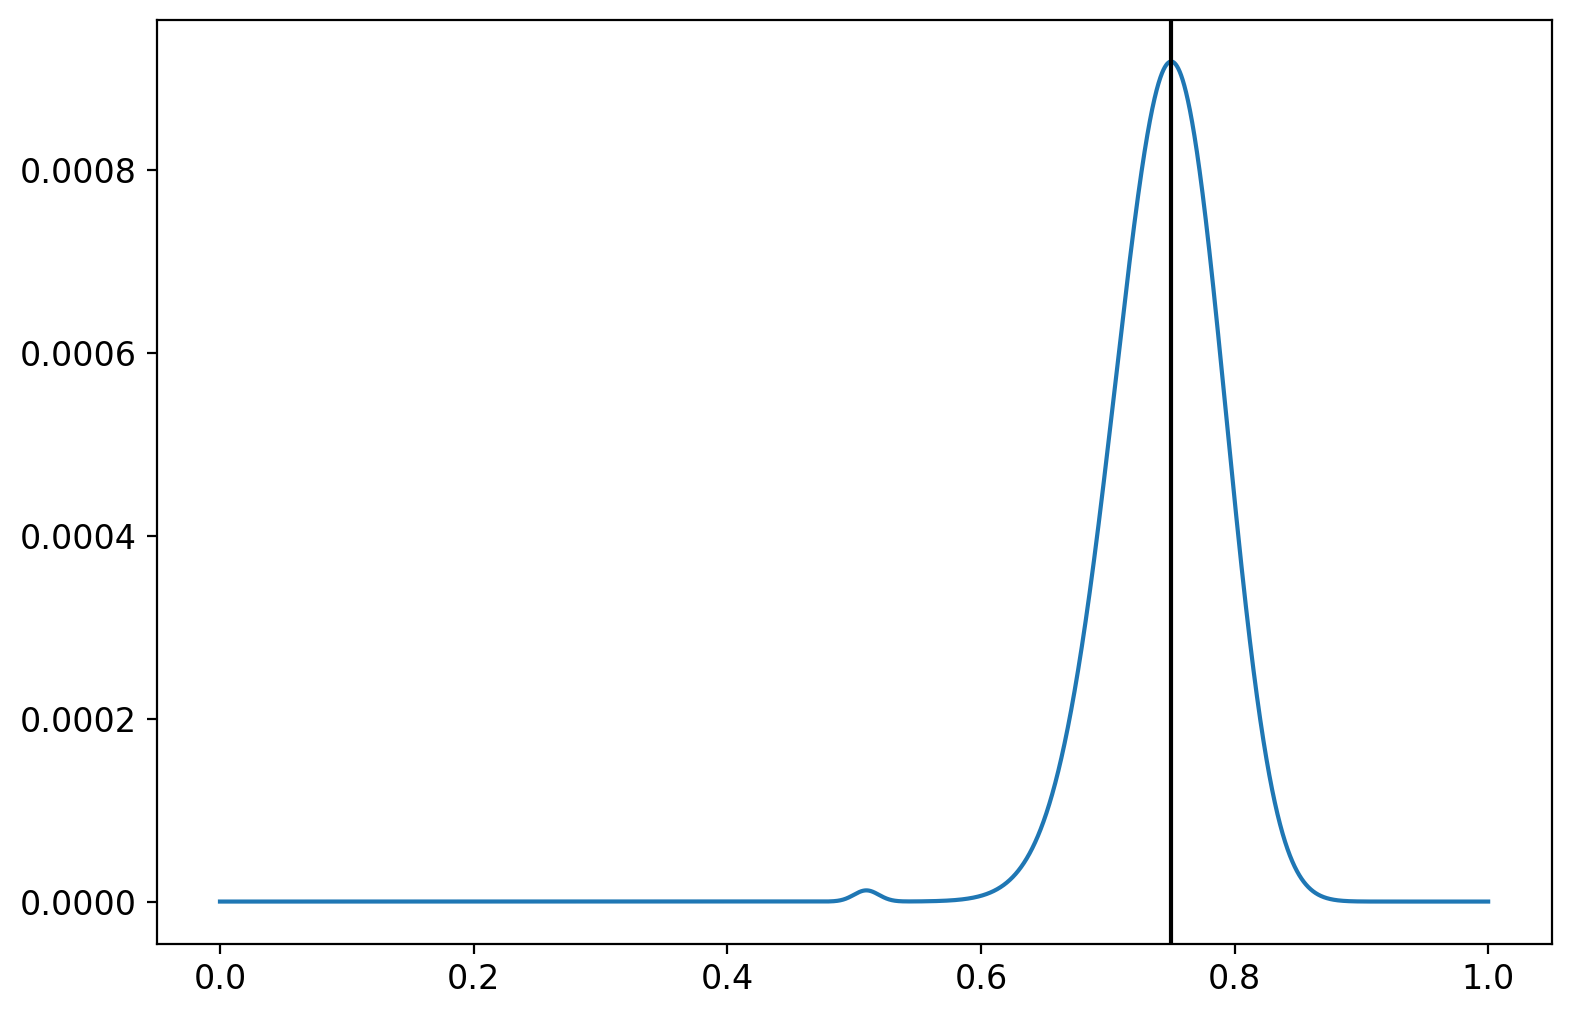

Best p:  0.75


In [9]:
#>>>PROBLEM: P9.2.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.
N = 100
m = 75
p = np.arange(0,1,.0001)
posterior = with_new_prior(p,N,m)     # calculating P(p|D)
plt.plot(p,posterior)


best_p = p[np.argmax(posterior)]          # getting the value of p where P(p|D) is maximized
plt.axvline(best_p,c='k')            # plotting the line at p where P(p|D) is maximized
plt.show()
print('Best p: ', round(best_p,3))


<h3>Summary</h3>

From the results obtained in this exercise, it is indeed surprising to observe that by changing our assumptions about the prior distribution, the inference regarding the fairness of the coin shifts. In the previous scenario, where we had 15 heads out of 20 flips, the frequentist approach led us to conclude that the coin is likely unfair. However, when we incorporated the new prior assumptions, the distributions for P(H) indicate a stronger inclination towards a fair coin.

This shift in the distribution occurs because the prior assumptions heavily favor the hypothesis of a fair coin. With a prior distribution centered at $p=0.5$ and a narrow standard deviation of $\sigma=0.01$, the prior assigns a high probability to values of P(H) near 0.5. This means that, according to our prior assumptions, we strongly believe the coin is fair.

When we combine this strong prior belief with the observed data of 15 heads out of 20 flips, the posterior distribution is influenced by both the prior and the likelihood. Since the prior distribution is heavily concentrated around fairness, the posterior distribution tends to be biased towards fair values of P(H).

To obtain a distribution that favors an unfair coin, we would need a substantial amount of data that significantly deviates from fairness. The influence of the prior diminishes as more data is incorporated, and the posterior becomes more determined by the observed evidence.

<a name='section_9_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P9.3 Example Applying Bayes' Theorem</h2>    

| [Top](#section_9_0) | [Previous Section](#section_9_2) | [Problems](#problems_9_3) |

<h3> Monty Hall game show problem</h3>

Now we will implement a version of the Monty Hall game show problem (the game where there are three rooms, one of which contains a prize). The goal is to analyze the probability of winning the prize by either sticking with the initially chosen room or switching to another room.

For this simulation, we will run a number of trials where elements in a `1 x 3` array represent rooms, one of which will be the prize room. An array entry value of 0 represents an empty room, and an array entry of 2 represents the prize room, which will be placed randomly within the array. Here is what the code is doing:

- The function `get_roomArr(iNits)` takes the number of iterations `iNits` as input and returns an `N x 3` array called `roomArr`, where each row represents an iteration of the game.

- At the beginning of each iteration, the `roomArr` is initialized with zeros, indicating that initially, there is no prize behind any of the rooms. The random seed is set to ensure reproducibility of the results.

- For each iteration, a random index is chosen among `[0, 1, 2]` using `random.choice()`. This index represents the room that will contain the prize for that particular iteration. The corresponding entry in `roomArr` is then set to 2, indicating the presence of the prize in that room.

- After iterating `iNits` times, the function returns the resulting `roomArr`, which contains the simulated game outcomes for the specified number of iterations.

In [10]:
#>>>RUN: P9.3-runcell01

import numpy as np
import random

#iNits is the number of iterations
def get_roomArr(iNits):
  roomArr = np.zeros([iNits,3]) ##initialize the doors with nothing behind them
  random.seed(1)
  for i in range(iNits):
    prizeIndex = random.choice([0,1,2])
    roomArr[i][prizeIndex] = 2 ## randomly place the prize room among the three possible rooms in each iteration of the game
  return roomArr

In this part of the code, we are simulating the process of randomly selecting a door to open in each iteration of the Monty Hall game. This will correspond to adding a 1 to a random entry within each row of array of rooms `roomArr`. Each row in the room array will either have two entries that are 0 and one entry that is a 3, meaning we selected the correct room on our first try, or the row will have entries of 0, 1, and 2, meaning that we did not select the correct row on our first try.

Specifically, the code is doing the following:

- For each iteration, we randomly choose an index from the options `[0, 1, 2]` using `random.choice()`. This index represents the door that we will open in that particular iteration.

- We then access the corresponding entry in the `roomArr` array and increment its value by 1. This operation corresponds to adding 1 to the selected door, indicating that we have "opened" or "chosen" that door in the game.

- After completing the iterations, the `roomArr` array will have been modified to reflect the results of randomly selecting a door to open in each iteration of the game.

In [16]:
#>>>RUN: P9.3-runcell02

Nits = 1000 ## number of iterations

roomArr = get_roomArr(Nits)

for i in range(Nits):
  ourDoorIndex = random.choice([0,1,2])
  roomArr[i][ourDoorIndex] += 1

<a name='problems_9_3'></a>     

| [Top](#section_9_0) | [Restart Section](#section_9_3) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 9.3.1</span>

For this simulation, in what fraction of games do we guess the correct room? What fraction do we expect, based on probabality theory? Complete the code below to make this calculation, then enter answers as a list of two numbers with precision 1e-3: `[numerical result, expectation]`

In [25]:
#>>>PROBLEM: 9.3.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.
numerical_result = 0
for i in range(Nits):
  if 3 in roomArr[i]:
    numerical_result += 1
numerical_result = numerical_result/Nits
expectation = 1/3

print('numerical result: ', numerical_result)
print('expectation: ', expectation)

numerical result:  0.329
expectation:  0.3333333333333333


<h3>The Host Opens a Door</h3>

In this section, we simulate the action of the game show host opening a door to a different, empty room after we have made our initial selection.

For each iteration of the game (represented by the variable i), we first identify the index of the empty room in the `roomArr` array. This is done by using `np.where(roomArr[i]==0)[0]`, which returns the indices of all the elements in `roomArr[i]` that have a value of 0.

Next, we randomly choose one of the indices from the empty room options using `random.choice()`. This index represents the door that the host will open.

We then access the corresponding entry in the `roomArr` array and change its value to -1. This modification indicates that the host has opened that door, revealing an empty room. By changing the value to -1, we differentiate it from the doors that are still available for us to select (-1 indicates an opened empty room).

After this step, each iteration of the game in the `roomArr` array will either have the elements 1, 2, and -1 (indicating that we initially chose an empty room) or 0, 3, and -1 (indicating that we initially chose the room with the prize). The -1 represents the door opened by the host.

In [26]:
#>>>RUN: P9.3-runcell03

for i in range(Nits):
  hostDoorIndex = random.choice(np.where(roomArr[i]==0)[0]) ##randomly select an empty room to open
  roomArr[i][hostDoorIndex] = -1

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 9.3.2</span>

Run the preceding code, which sets new values within the array `roomArr` that correspond to events when the host opens an empty room. Then, similar to the previous problem, complete the code below to calculate the fraction of games where it is better to switch from your first door choice. What fraction do we expect, based on probabality theory? Enter answers as a list of two numbers with precision 1e-3: `[numerical result, expectation]`

In [27]:
#>>>PROBLEM: P9.3.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.
numerical_result = 0
for i in range(Nits):
  if 2 in roomArr[i]:
    numerical_result += 1
numerical_result = numerical_result/Nits
expectation = 2/3

print('numerical result: ', numerical_result)
print('expectation: ', expectation)

numerical result:  0.671
expectation:  0.6666666666666666


<h3> Conclusions </h3>

Let's now reflect on the key findings and implications of the Bayesian analysis compared to the frequentist perspective.

Firstly, the conclusions drawn from the Bayesian perspective heavily depend on the choice of prior assumptions. The prior represents our initial beliefs or knowledge about the problem before incorporating the observed data. In the examples discussed, different prior assumptions about the fairness of a coin led to different posterior distributions and conclusions about the probability of heads. This highlights the subjectivity and flexibility of the Bayesian approach, allowing us to incorporate prior knowledge or beliefs into our analysis.

However, it is important to note that the strong influence of the prior on the results can also raise concerns. If our prior assumptions significantly impact the conclusions, it suggests that our data may not be providing strong constraints on our model. In other words, our prior beliefs may overshadow the evidence from the data, leading to less reliable or objective results. This emphasizes the need for careful consideration and evaluation of the prior assumptions and their impact on the final conclusions.

Our exploration of the difference between the frequentist and Bayesian analysis should not leave you with the idea that one is much better or accurate than the other, both are powerful tools for data analysis that have different cases for optimal use.